<a href="https://colab.research.google.com/github/npnavas/MAT_421/blob/main/MAT_421_HW_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.1 Interpolation Problem statement
Here the idea of interpolation is that given a $n$ data points 
$$(x_1,y_1),(x_2,y_2)\dots (x_n,y_n)$$
we can construct a function $f$ such that for a new data point $x^\star$ that is contained within the domain of our data, we can find $$f(x^\star) = y^\star \implies (x^\star,y^\star)$$ 
which is connected within our sample data.

For this section we will use the following sample data
$$(0,0),(1,1),(2,0),(3,-3),(4,0),(5,5)$$


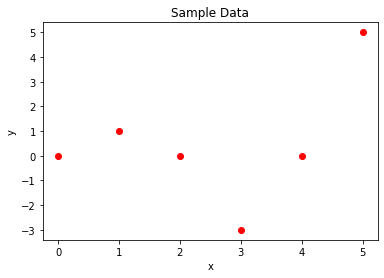

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,6)
y = np.array([0,1,0,-3,0,5])
plt.plot(x,y,'ro') 
plt.title('Sample Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Here let's consider trying to find $y^\star$ at $x^\star = \frac{9}{2}$ using two different interpolation methods

# 17.2 Linear Interpolation
Here the most simple interpolation method would be linear interpolation. The premise is we assume that $x_i<x^\star<x_{i+1}$ and assume that a line segment runs between $x_i$ and $x_{i+1}$. From here it we can use the following formula (which is derived from the point slop formula)
$$y^\star = y_i +\dfrac{(y_{i+1}-y_i)(x^\star-x_i)}{x_{i+1}-x_i}$$
Note that this changes depending on where $x^\star$ is within the data. Let's see how this works for our data set at $x^\star = \frac{9}{2}$.
$$y^\star = 0 + \dfrac{(5-0)\left(\frac{9}{2}-4\right)}{5-4} = \frac{5}{2}$$
Let's use the Scipy library to confirm this value.

In [11]:
from scipy.interpolate import interp1d
x = np.arange(0,6)
y = np.array([0,1,0,-3,0,5])
f = interp1d(x, y)
ystar = f(9/2)
print(ystar)

2.5


Graphing this result gives us the following

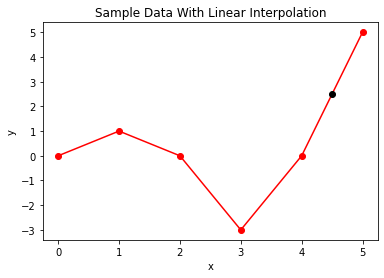

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
f = interp1d(x_data, y_data)
xstar = 9/2
ystar = f(xstar)
plt.plot(x_data,y_data,'ro-',xstar,ystar,'ko') 
plt.title('Sample Data With Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 17.3 Cubic Spline Interpolation
Here we introduce a more intracate method of interpolation called the cubic spline method. Here the idea is between points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ we construct a cubic function $$S_i(x) = a_i x^3+b_ix^2+c_ix+d_i.$$
Note if we try to solve for the coefficients we'll have $4(n-1)$ unknowns and thus we'll need $4(n-1)$ independent equations to find them. First it's trivial to know that we need each neighboring cubic need to intersect at each data point. Next we want these cubics to be smooth at $(x_i,y_i)$ so what we'll dp is make sure the first and second derivatives also match at $(x_i,y_i)$, then when it comes to the endpoints we will restrict the second derivative to be zero. Here we can use Scipy's cubic spline function to do the heavy lifting here since the system of equations for interpolating an $n$-point system would need us to find the inverse of a $4(n-1)\times4(n-1)$ matrix which even for small $n$ is difficult to do by hand. Let's consider our data set and point we want to interpolate from 17.1   

2.471291866028708


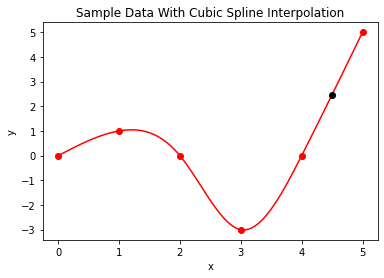

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
f = CubicSpline(x_data, y_data, bc_type='natural')
xstar = 9/2
ystar = f(xstar)
print(ystar)
x = np.linspace(0, 5, 500)
y = f(x)
plt.plot(x_data,y_data,'ro',x,y,"r",xstar,ystar,'ko') 
plt.title('Sample Data With Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To see how accurate this is I costructed the data in such a way that I know the exact function. The exact function being $$x\sin\left(\frac{\pi}{2} x\right).$$ Let's plot this along with our linear and cubic spline interpolation 

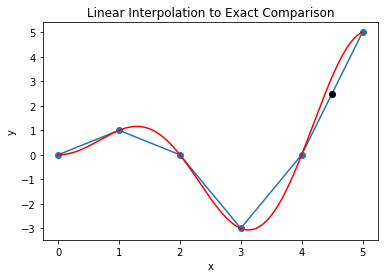

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
f = interp1d(x_data, y_data)
xstar = 9/2
ystar = f(xstar)
x = np.linspace(0, 5, 500)
y = x*np.sin(x*np.pi/2)
plt.plot(x_data,y_data,'o-',x,y,"r",xstar,ystar,'ko') 
plt.title('Linear Interpolation to Exact Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

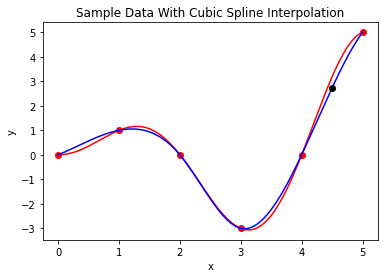

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
f = CubicSpline(x_data, y_data)
xstar = 9/2
ystar = f(xstar)
x = np.linspace(0, 5, 500)
y = x*np.sin(x*np.pi/2)
plt.plot(x_data,y_data,'ro',x,y,"r", x,f(x),"b", xstar,ystar,'ko') 
plt.title('Cubic Spline Interpolation to Exact Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We see that right now cubic spline is our most accurate method as of right now. We'll try Lagrangian and Newtonian interpolation methods in the next sections to see if we can improve our interpolation accuracy.   